In [37]:
import pandas as pd
import seaborn as sb

In [16]:
df=pd.read_csv('titanic.csv')

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.drop(columns=['PassengerId','Name','Ticket','Fare','Cabin','Embarked'],inplace=True)

In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [22]:
df.rename(columns={
    old_name:old_name.lower() for old_name in df.columns
},
          inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


<Axes: ylabel='Frequency'>

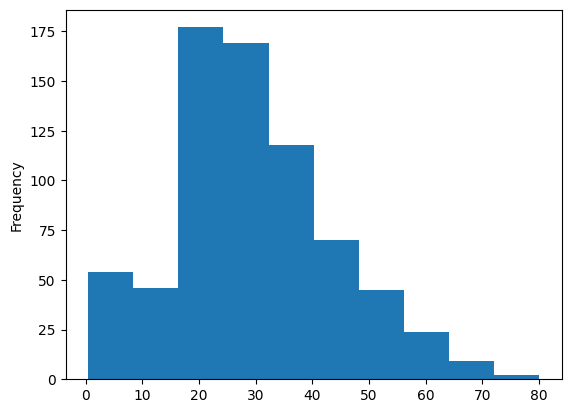

In [24]:
df['age'].plot(kind='hist')

In [25]:
med=df['age'].median()

In [27]:
df['age'].fillna(med,inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [31]:
for col in df.columns:
    if col!='age':
        print(col)
        print(df[col].unique())
        print("="*20)

survived
[0 1]
pclass
[3 1 2]
sex
['male' 'female']
sibsp
[1 0 3 4 2 5 8]
parch
[0 1 2 5 3 4 6]


In [32]:
for col in df.columns:
    if col!='age':
        df[col]=df[col].astype('category')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    category
 1   pclass    891 non-null    category
 2   sex       891 non-null    category
 3   age       891 non-null    float64 
 4   sibsp     891 non-null    category
 5   parch     891 non-null    category
dtypes: category(5), float64(1)
memory usage: 12.5 KB


In [36]:
df['age'].min()

np.float64(0.42)

<Axes: xlabel='age'>

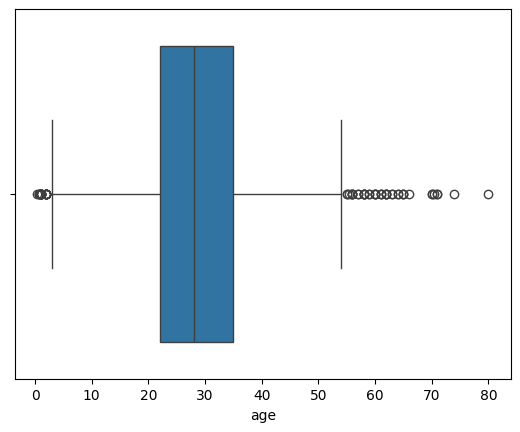

In [38]:
sb.boxplot(data=df,x='age')

In [48]:
Q1=df['age'].quantile(.25)
Q3=df['age'].quantile(.75)
IQR=Q3-Q1
lower_fence=Q1-1.5*IQR
upper_fence=Q3+1.5*IQR
upper_outliers=df[df['age']>upper_fence]['age'].values
lower_outliers=df[df['age']<lower_fence]['age'].values
df['age'].replace([upper_outliers,lower_outliers],[upper_fence,lower_fence],inplace=True)

In [41]:
upper_outliers

array([58. , 55. , 66. , 65. , 59. , 71. , 70.5, 55.5, 61. , 56. , 58. ,
       59. , 62. , 58. , 63. , 65. , 61. , 60. , 64. , 65. , 56. , 63. ,
       58. , 55. , 71. , 64. , 62. , 62. , 60. , 61. , 57. , 80. , 56. ,
       58. , 70. , 60. , 60. , 70. , 57. , 62. , 74. , 56. ])

In [42]:
lower_outliers

array([2.  , 2.  , 0.83, 2.  , 1.  , 1.  , 1.  , 2.  , 2.  , 0.92, 2.  ,
       1.  , 1.  , 0.75, 2.  , 2.  , 2.  , 0.75, 0.67, 1.  , 0.42, 2.  ,
       1.  , 0.83])

In [46]:
df[df['sex']=='female']['sex'].values

['female', 'female', 'female', 'female', 'female', ..., 'female', 'female', 'female', 'female', 'female']
Length: 314
Categories (2, object): ['female', 'male']

<Axes: xlabel='age'>

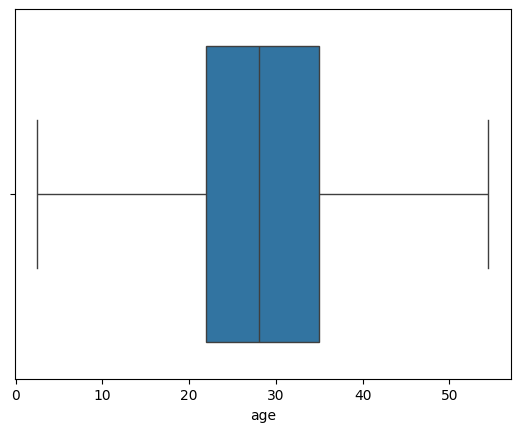

In [49]:
sb.boxplot(data=df,x='age')

In [53]:
df['sex'].plot(kind='bar')

TypeError: no numeric data to plot

In [54]:
df['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

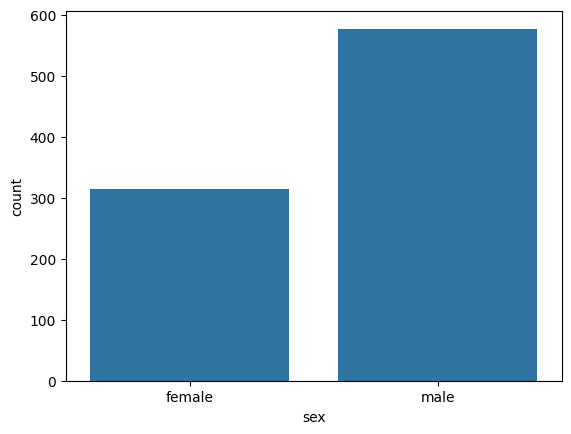

In [55]:
sb.barplot(df['sex'].value_counts())